In [72]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

### Downloading the dataset

In [73]:
# !kaggle datasets download uciml/sms-spam-collection-dataset

In [74]:
# # extracting the compressed dataset

# from zipfile import ZipFile
# dataset = 'sms-spam-collection-dataset.zip'

# with ZipFile(dataset,'r') as zip:
#     zip.extractall()
#     print("The dataset is extracted")

In [75]:
import numpy as np
import pandas as pd



In [76]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [77]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [78]:
df.shape

(5572, 5)

# steps:
1. Data cleaning
2. EDA
3. Text preprocessing
4. Model building 
5. Evaluation
6. improvement
7. Website
8. Deployment


# 1. Data cleaning

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [80]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace= True)

In [81]:
df.shape

(5572, 2)

In [82]:
df.sample(5)

,v1,v2
3318,ham,Kay... Since we are out already
1178,ham,"I'm outside islands, head towards hard rock an..."
4422,ham,alright. Thanks for the advice. Enjoy your nig...
4396,ham,When did dad get back.
3297,spam,This message is free. Welcome to the new & imp...


In [83]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [84]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [85]:
df['target'] = encoder.fit_transform(df['target'])


In [86]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [87]:
# missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [88]:
# check for duplicate values
int(df.duplicated().sum())

403

In [89]:
# removing duplicates
df = df.drop_duplicates(keep = 'first')

# 2. EDA

In [90]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

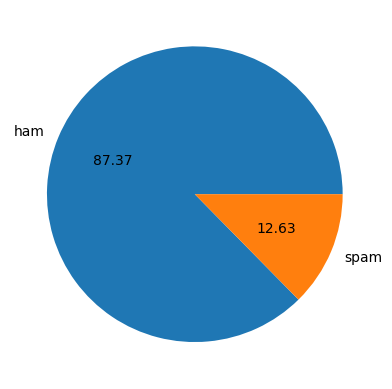

In [91]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [92]:
# Data is imbalanced

In [108]:
import nltk

In [96]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [109]:
df['num_characters'] = df['text'].apply(len)

/var/folders/nn/lc5n9zn964zcgsw9v2_vpjvw0000gn/T/ipykernel_9961/253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [110]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [111]:
from nltk.tokenize import word_tokenize
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/aakashkhanal/nltk_data'
    - '/Users/aakashkhanal/Desktop/Project_fellowship/Internship_project/spam_classifier/myenv/nltk_data'
    - '/Users/aakashkhanal/Desktop/Project_fellowship/Internship_project/spam_classifier/myenv/share/nltk_data'
    - '/Users/aakashkhanal/Desktop/Project_fellowship/Internship_project/spam_classifier/myenv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/Users/aakashkhanal/nltk_data'
**********************************************************************
